# Comparison with existing python libraries
## using package pca

#### Data import used from dataimport.py

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

get the data from data.csv

save it in dataframe to add the labels + save a copy in dataframe1 to have the data without the added labels

In [2]:
from dataimport import get_df_merged_with_labels
dataframe =  get_df_merged_with_labels()
print(dataframe.head(10))

  Class  gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
0  PRAD     0.0  2.017209  3.265527  5.478487  10.431999     0.0  7.175175   
1  LUAD     0.0  0.592732  1.588421  7.586157   9.623011     0.0  6.816049   
2  PRAD     0.0  3.511759  4.327199  6.881787   9.870730     0.0  6.972130   
3  PRAD     0.0  3.663618  4.507649  6.659068  10.196184     0.0  7.843375   
4  BRCA     0.0  2.655741  2.821547  6.539454   9.738265     0.0  6.566967   
5  PRAD     0.0  3.467853  3.581918  6.620243   9.706829     0.0  7.758510   
6  KIRC     0.0  1.224966  1.691177  6.572007   9.640511     0.0  6.754888   
7  PRAD     0.0  2.854853  1.750478  7.226720   9.758691     0.0  5.952103   
8  BRCA     0.0  3.992125  2.772730  6.546692  10.488252     0.0  7.690222   
9  PRAD     0.0  3.642494  4.423558  6.849511   9.464466     0.0  7.947216   

     gene_7  gene_8  ...  gene_20521  gene_20522  gene_20523  gene_20524  \
0  0.591871     0.0  ...    4.926711    8.210257    9.723516    7

get a copy of dataframe without the labels

In [3]:
# Drop column 'Unnamed'
if 'Class' in dataframe.columns:
    df1 = dataframe.drop(['Class'], axis=1)

print(df1.head(10))

   gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
0     0.0  2.017209  3.265527  5.478487  10.431999     0.0  7.175175   
1     0.0  0.592732  1.588421  7.586157   9.623011     0.0  6.816049   
2     0.0  3.511759  4.327199  6.881787   9.870730     0.0  6.972130   
3     0.0  3.663618  4.507649  6.659068  10.196184     0.0  7.843375   
4     0.0  2.655741  2.821547  6.539454   9.738265     0.0  6.566967   
5     0.0  3.467853  3.581918  6.620243   9.706829     0.0  7.758510   
6     0.0  1.224966  1.691177  6.572007   9.640511     0.0  6.754888   
7     0.0  2.854853  1.750478  7.226720   9.758691     0.0  5.952103   
8     0.0  3.992125  2.772730  6.546692  10.488252     0.0  7.690222   
9     0.0  3.642494  4.423558  6.849511   9.464466     0.0  7.947216   

     gene_7  gene_8    gene_9  ...  gene_20521  gene_20522  gene_20523  \
0  0.591871     0.0  0.000000  ...    4.926711    8.210257    9.723516   
1  0.000000     0.0  0.000000  ...    4.593372    7.323865 

In [4]:
# Move column 'Class' at the first position
cols = dataframe.columns.tolist()
if cols[-1] == 'Class':
    cols = cols[-1:] + cols[:-1]
    dataframe = dataframe[cols]
dataframe.head()

,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,PRAD,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,LUAD,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,PRAD,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,PRAD,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,BRCA,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


## PCA implementation

using data in df

#### package pca

In [5]:
from pca import pca

In [6]:
# Initialize pca with default parameters
model = pca(normalize=True)

In [7]:
# Load dataset df
X = df1
col_labels = dataframe.Class

look at ellbow plot of explained variance

In [8]:
# Fit transform
results = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [20531] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [530] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [20531] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[530]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 530 Principal Components explain [95.03%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

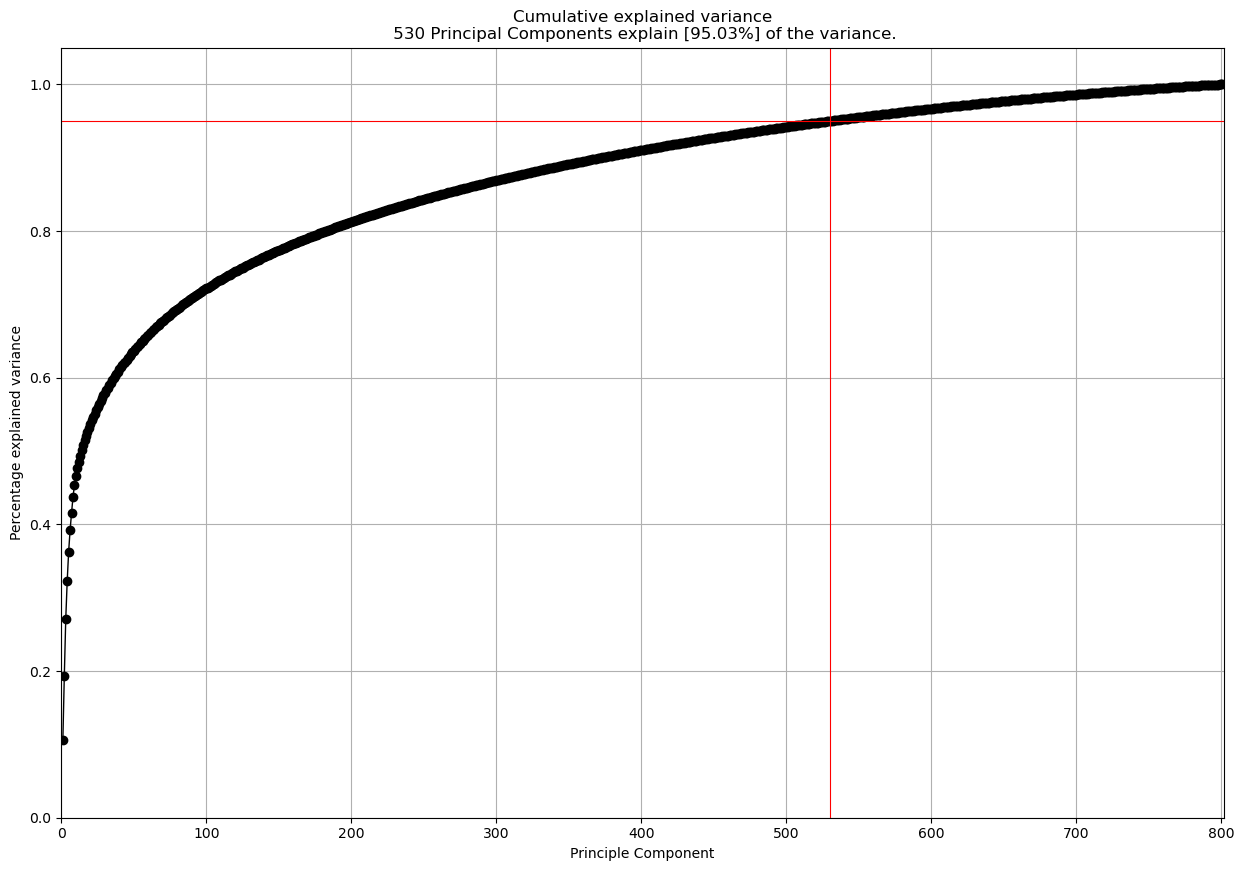

In [9]:
# Plot the explained variance
model.plot()

plot first two PCs

[datazets] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
[datazets] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '530 Principal Components explain [95.03%] of the variance'}, xlabel='PC1 (10.5% expl.var)', ylabel='PC2 (8.75% expl.var)'>)

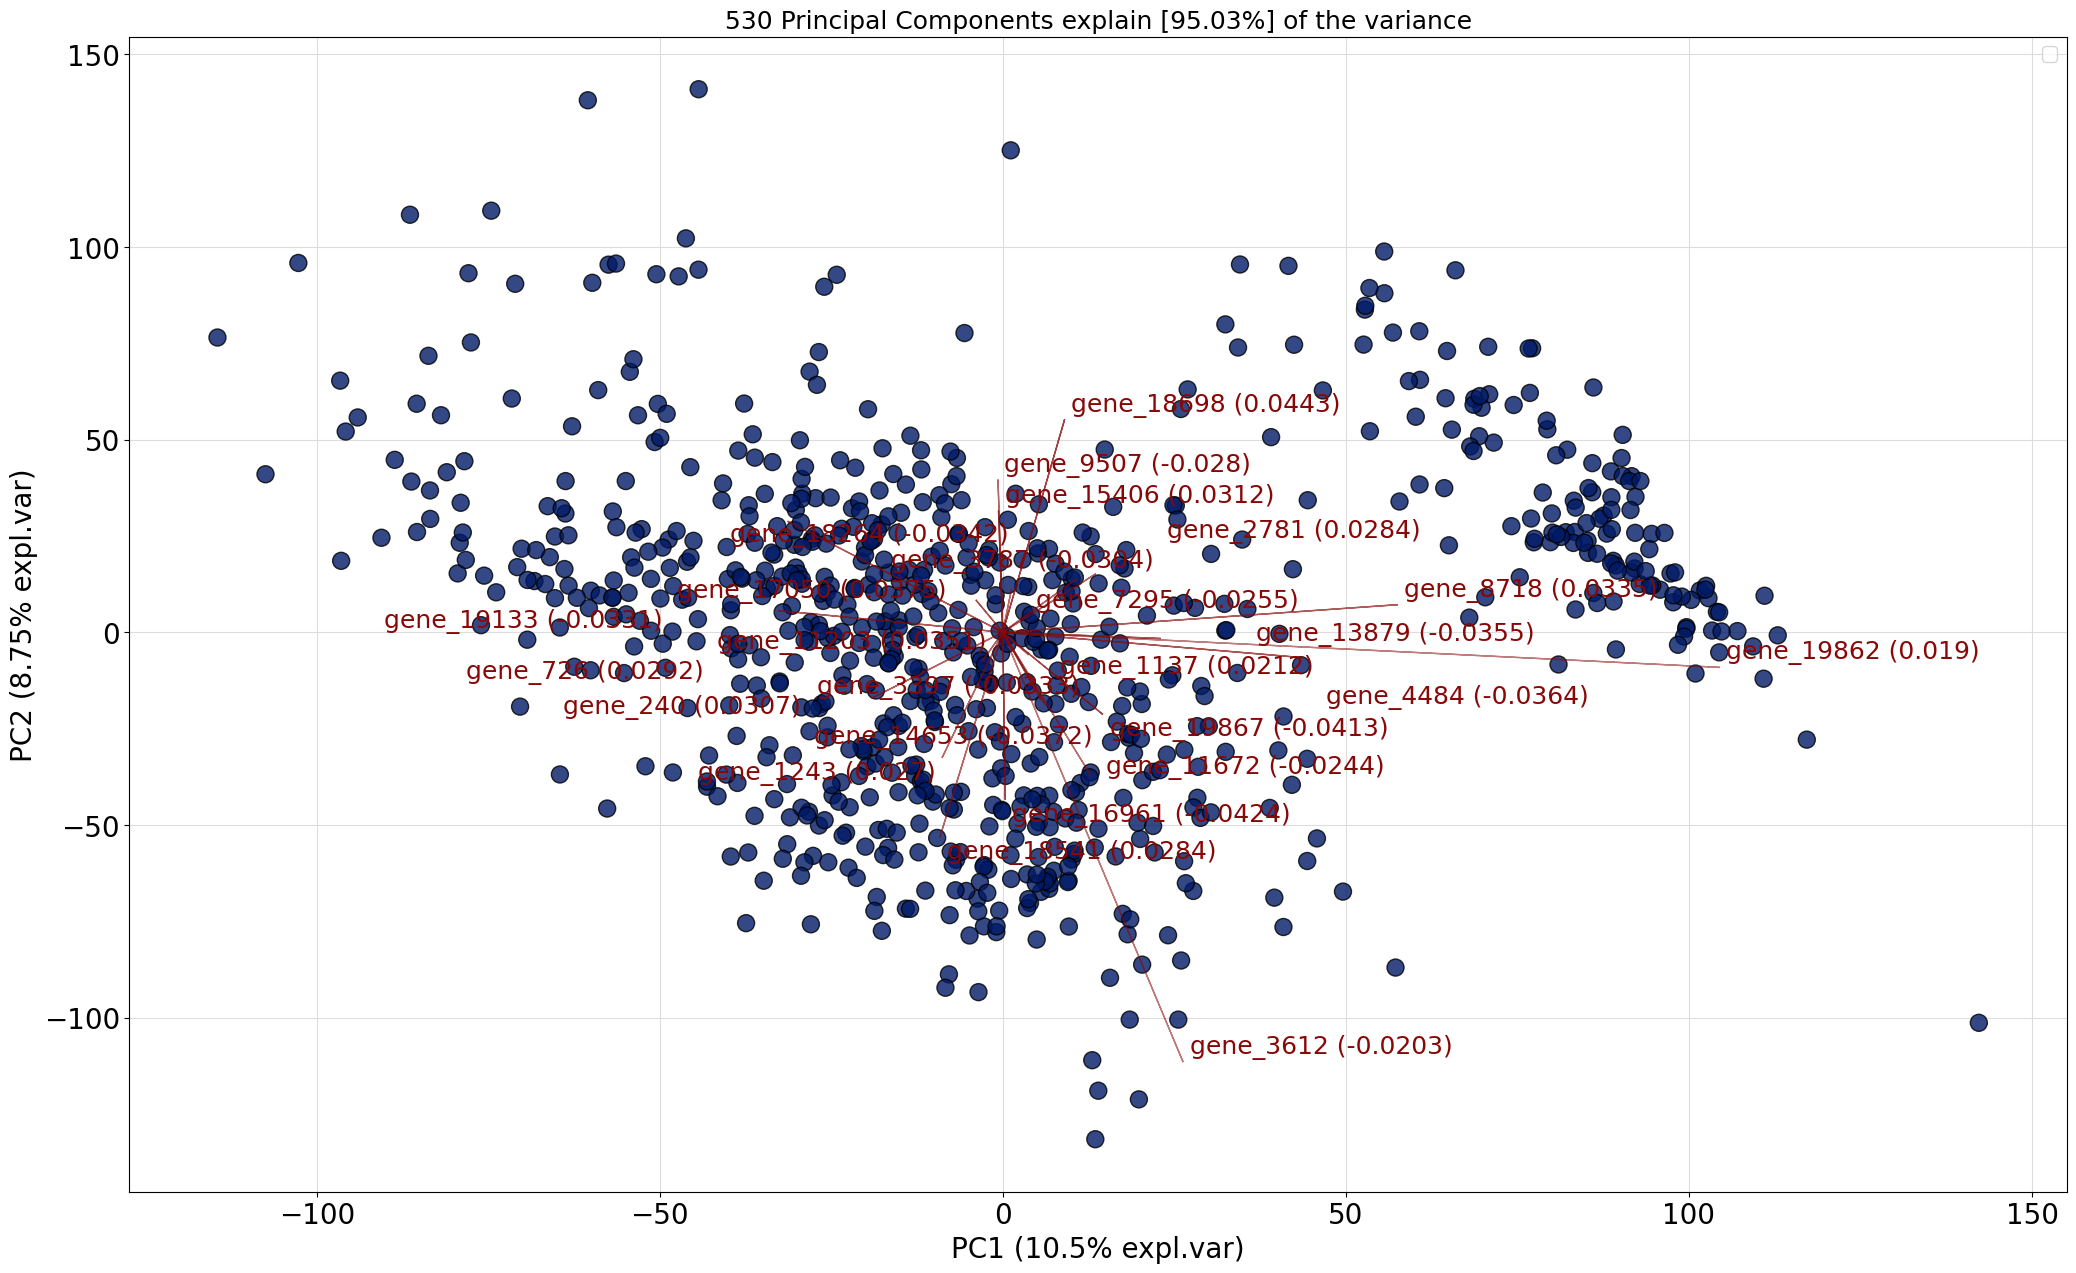

In [10]:
# Scatter plot with loadings
model.biplot()

### PCA implementation with sklearn

In [11]:
from sklearn.decomposition import PCA

In [12]:
dataframe.head()

,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,PRAD,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,LUAD,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,PRAD,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,PRAD,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,BRCA,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


calculate the number of missing values (NaN values) in each column of a DataFrame

In [13]:
dataframe.isnull().sum()

Class         0
gene_0        0
gene_1        0
gene_2        0
gene_3        0
             ..
gene_20526    0
gene_20527    0
gene_20528    0
gene_20529    0
gene_20530    0
Length: 20532, dtype: int64

just data for pca

In [14]:
print(df1.values.shape)
df1.head()

(801, 20531)


,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [15]:
pca_data = df1.values
pca_data

array([[ 0.        ,  2.01720929,  3.26552691, ...,  8.92132623,
         5.28675919,  0.        ],
       [ 0.        ,  0.59273209,  1.58842082, ...,  9.39785429,
         2.09416849,  0.        ],
       [ 0.        ,  3.51175898,  4.32719872, ..., 10.09046974,
         1.68302267,  0.        ],
       ...,
       [ 0.        ,  3.24958187,  3.70749166, ...,  9.46671072,
         4.6774575 ,  0.5866927 ],
       [ 0.        ,  2.59033853,  2.78797567, ..., 10.40058062,
         5.71875068,  0.        ],
       [ 0.        ,  2.32524248,  3.80593214, ...,  9.84479363,
         4.55071601,  0.        ]])

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Scaling data with scaler method

In [17]:
scaler = StandardScaler()
data_Scaled = scaler.fit_transform(pca_data)
data_Scaled

array([[-0.19479935, -0.82802988,  0.15980044, ..., -1.18793812,
        -0.11648251, -0.26190144],
       [-0.19479935, -2.01501735, -1.415042  , ..., -0.34227662,
        -1.65688871, -0.26190144],
       [-0.19479935,  0.41734754,  1.15673547, ...,  0.88686027,
        -1.85526414, -0.26190144],
       ...,
       [-0.19479935,  0.19888076,  0.57481583, ..., -0.22008186,
        -0.41046699,  1.3485582 ],
       [-0.19479935, -0.35045311, -0.28863152, ...,  1.43719268,
         0.09195083, -0.26190144],
       [-0.19479935, -0.57135218,  0.66725377, ...,  0.45087581,
        -0.47161901, -0.26190144]])

PCA with n_components=2

In [18]:
# define number of components as 2 
pca_2_components=PCA(n_components=2)

In [19]:
#Perform fit transform on the scaled data
data_pca_2_components = pca_2_components.fit_transform(data_Scaled)
data_pca_2_components.shape

(801, 2)

In [20]:
data_pca_2_components

array([[-57.44698692,  95.41098072],
       [-16.91943006,   0.73247045],
       [-70.34521787, -19.30332629],
       ...,
       [ -4.13308964,  15.6900135 ],
       [-30.81475748,  33.52642247],
       [-22.34455667,   4.05235639]])

In [21]:
eigenvectors_sklearn = pca_2_components.components_
eigenvectors_sklearn

array([[ 0.00097941, -0.00235639, -0.00496579, ...,  0.00233708,
         0.00195967,  0.00104891],
       [ 0.00230787, -0.00637287,  0.00046648, ..., -0.01493974,
        -0.00232062,  0.00100493]])

In [22]:
# Put the data back on the 2 columns defined 
pca_data_2comp = pd.DataFrame(data_pca_2_components)
pca_data_2comp.columns = ['pca1','pca2']

# Add the convereted categorical data for 
pca_data_2comp['cancer_type']=dataframe['Class']
pca_data_2comp

,pca1,pca2,cancer_type
0,-57.446987,95.410981,PRAD
1,-16.919430,0.732470,LUAD
2,-70.345218,-19.303326,PRAD
3,-49.161591,-9.227586,PRAD
4,-18.132534,-51.327797,BRCA
...,...,...,...
796,-12.417385,-42.321574,BRCA
797,-29.415554,28.526281,LUAD
798,-4.133090,15.690013,COAD
799,-30.814757,33.526422,PRAD


In [23]:
import seaborn as sns

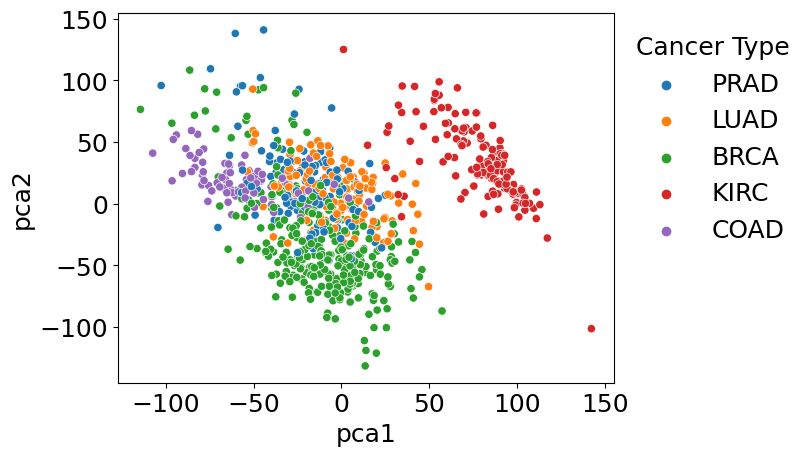

In [24]:
# Present the data on the 5 clusters using seaborn maps 
sns.scatterplot(x='pca1',y='pca2', hue = 'cancer_type',data=pca_data_2comp)
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1), title="Cancer Type", frameon=False)
# Show the plot
plt.show()

In [25]:
# Compute the explained variance ratio
explained_variance_ratio = pca_2_components.explained_variance_ratio_
explained_variance_ratio
# Sum the elements of the array
var_sum = np.sum(explained_variance_ratio)
var_sum

0.192940138199242

In [26]:
# show how much variance each component explains
explained_variance_ratio

array([0.10539781, 0.08754232])

In [27]:
print(pca_2_components.singular_values_)

[1307.96055583 1192.03191725]


pca 2 components on unscaled data -> the data is centered with the method fit_transform()

In [28]:
#Perform fit transform on the scaled data
data_pca_2_comp_unscaled = pca_2_components.fit_transform(pca_data)
data_pca_2_comp_unscaled.shape

(801, 2)

In [29]:
data_pca_2_comp_unscaled

array([[-62.75541522, -94.0719734 ],
       [ -2.43289635,  90.58584176],
       [-71.26685285,  -8.06460772],
       ...,
       [ 10.48626144,  21.57059465],
       [-55.06360486, -92.39477803],
       [-49.10303379, -50.99763902]])

In [30]:
# Put the data back on the 2 columns defined 
pca_data_2comp_unscaled = pd.DataFrame(data_pca_2_comp_unscaled)
pca_data_2comp_unscaled .columns = ['pca1','pca2']

# Add the convereted categorical data for 
pca_data_2comp_unscaled ['cancer_type']=dataframe['Class']
pca_data_2comp_unscaled

,pca1,pca2,cancer_type
0,-62.755415,-94.071973,PRAD
1,-2.432896,90.585842,LUAD
2,-71.266853,-8.064608,PRAD
3,-84.770785,-73.244566,PRAD
4,-69.560171,-9.612940,BRCA
...,...,...,...
796,-60.861882,-22.278633,BRCA
797,-14.465433,53.392194,LUAD
798,10.486261,21.570595,COAD
799,-55.063605,-92.394778,PRAD


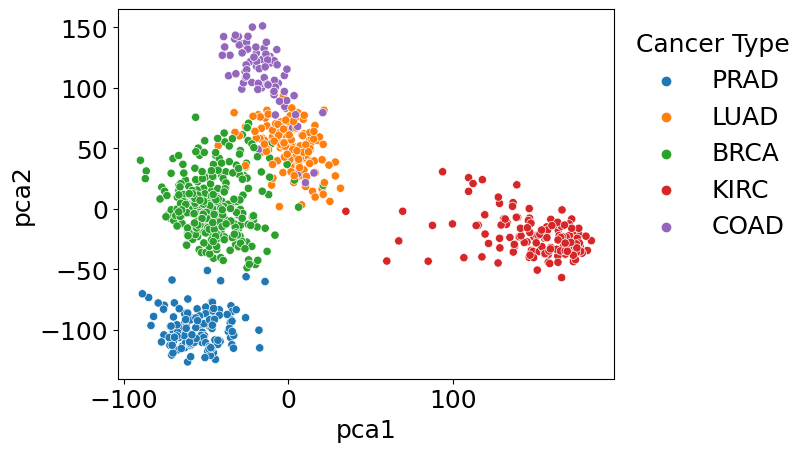

In [31]:
# Present the data on the 5 clusters using seaborn maps 
sns.scatterplot(x='pca1',y='pca2', hue = 'cancer_type',data=pca_data_2comp_unscaled)
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1), title="Cancer Type", frameon=False)
# Show the plot
plt.show()

In [32]:
# Compute the explained variance ratio
explained_variance_ratio = pca_2_components.explained_variance_ratio_
explained_variance_ratio
# Sum the elements of the array
var_sum = np.sum(explained_variance_ratio)
var_sum

0.2634251024443476

In [33]:
explained_variance_ratio

array([0.1583855, 0.1050396])

In [34]:
print(pca_2_components.singular_values_)

[2142.26910596 1744.58784556]


PCA with n_components=.995

In [35]:
pca_995_varexpl=PCA(.995)
data_pca_995_varexpl = pca_995_varexpl.fit_transform(pca_data)
data_pca_995_varexpl.shape
data_pca_995_varexpl

array([[-6.27554152e+01, -9.40719735e+01,  8.95198311e+01, ...,
         3.09258084e+00,  7.13597730e-01, -8.21221710e-02],
       [-2.43289636e+00,  9.05858418e+01, -1.06730787e+00, ...,
         1.39674724e-02, -3.95175744e-01, -9.49947250e-01],
       [-7.12668528e+01, -8.06460774e+00,  6.61124549e+01, ...,
         1.28898532e-01, -2.64530262e-01,  3.84594189e-01],
       ...,
       [ 1.04862615e+01,  2.15705946e+01,  4.13458784e+01, ...,
        -6.47882986e-01, -2.07256774e-01,  1.38942922e-01],
       [-5.50636049e+01, -9.23947780e+01,  8.00500394e+01, ...,
         1.74673062e+00,  2.02232239e+00, -1.92708948e+00],
       [-4.91030338e+01, -5.09976391e+01,  4.05037544e+01, ...,
         1.80367340e+00,  2.22994027e+00, -8.07255452e-01]])

In [36]:
df_pca_995 = pd.DataFrame(data_pca_995_varexpl)
df_pca_995['cancer_type']=dataframe['Class']
df_pca_995

,0,1,2,3,4,5,6,7,8,9,...,738,739,740,741,742,743,744,745,746,cancer_type
0,-62.755415,-94.071973,89.519831,-15.942567,81.423539,-13.998292,7.716073,-22.936551,-32.837892,-2.202680,...,-4.081064,-0.626193,-1.265756,-0.017984,-2.740860,0.944037,3.092581,0.713598,-0.082122,PRAD
1,-2.432896,90.585842,-1.067308,-53.083120,-15.676684,60.842472,10.257369,-48.822959,14.257400,-12.214352,...,0.215619,-0.593678,-0.403462,1.181537,0.490910,0.197768,0.013967,-0.395176,-0.949947,LUAD
2,-71.266853,-8.064608,66.112455,81.381475,-7.525685,109.824273,5.519407,-13.364480,38.415728,-5.124731,...,0.263786,0.328453,0.004078,0.363928,-1.109210,0.331488,0.128899,-0.264530,0.384594,PRAD
3,-84.770785,-73.244566,74.181000,27.022697,-18.044895,50.116433,-3.495197,-11.318520,8.319656,-3.149509,...,0.381578,0.652455,-3.624900,-1.203028,-2.347912,1.577992,-0.781748,0.120442,-0.057973,PRAD
4,-69.560171,-9.612940,-67.497549,34.868543,-1.795849,-6.676780,-2.840781,16.780157,-49.319753,10.508631,...,1.488047,2.767486,-0.631562,-0.794275,-0.514008,-1.875969,-2.526109,-1.073803,-1.161728,BRCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,-60.861882,-22.278633,-80.927167,42.670292,7.843763,-4.545218,-27.602910,-8.840676,-31.531870,6.380236,...,-0.780676,0.105227,-2.001001,1.579115,0.955344,0.085881,2.667448,0.632850,0.023523,BRCA
797,-14.465433,53.392194,38.153904,-63.217345,22.799082,39.543441,-47.899401,39.925172,-12.413483,43.364820,...,-0.712822,0.624739,-0.162403,-0.238540,0.584705,1.404867,0.564251,-0.054682,-0.905574,LUAD
798,10.486261,21.570595,41.345878,-59.639929,-2.163066,-96.453878,38.375897,46.997294,60.604643,59.967025,...,0.269628,-0.348648,-0.531710,0.055553,0.220559,0.331122,-0.647883,-0.207257,0.138943,COAD
799,-55.063605,-92.394778,80.050039,-7.782015,15.180574,2.563620,8.487660,10.571657,11.710577,1.304005,...,0.045885,-2.222754,-4.115667,-0.064646,-0.447662,-0.243658,1.746731,2.022322,-1.927089,PRAD


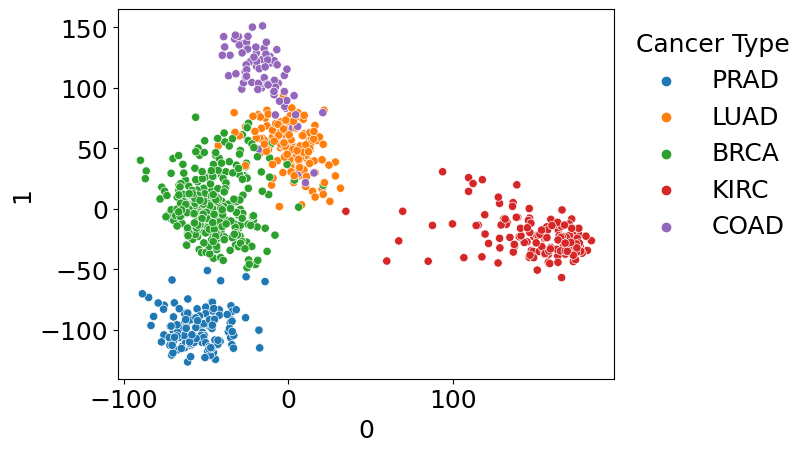

In [37]:
sns.scatterplot(x=0,y=1,hue = 'cancer_type', data=df_pca_995)
# Move the hue legend to the top right corner
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1), title="Cancer Type", frameon=False)
# Show the plot
plt.show()

In [38]:
# Compute the explained variance ratio
explained_variance_ratio2 = pca_995_varexpl.explained_variance_ratio_
explained_variance_ratio2
# Sum the elements of the array
var_sum = np.sum(explained_variance_ratio2)
var_sum

0.99508534402634

pca with 0.8 variance explained

In [39]:
pca_80_varexpl=PCA(.8)
data_pca_80_varexpl = pca_80_varexpl.fit_transform(pca_data)
data_pca_80_varexpl.shape
data_pca_80_varexpl

array([[-6.27554152e+01, -9.40719735e+01,  8.95198311e+01, ...,
         7.94060388e+00, -7.06680386e+00, -2.81226053e+00],
       [-2.43289636e+00,  9.05858418e+01, -1.06730787e+00, ...,
         1.26990540e+01,  4.14578902e+00, -2.97892770e+00],
       [-7.12668528e+01, -8.06460774e+00,  6.61124549e+01, ...,
         5.60617355e+00,  6.99430777e+00,  1.09666054e+00],
       ...,
       [ 1.04862615e+01,  2.15705946e+01,  4.13458784e+01, ...,
         3.94600387e-01, -8.98429207e+00,  1.53112076e+01],
       [-5.50636049e+01, -9.23947780e+01,  8.00500394e+01, ...,
        -3.33436633e+00,  6.07479033e+00, -5.17118054e-02],
       [-4.91030338e+01, -5.09976391e+01,  4.05037544e+01, ...,
         1.03919355e+01, -1.49445353e+01, -6.67653034e+00]])

In [40]:
df_pca_8 = pd.DataFrame(data_pca_80_varexpl)
df_pca_8['cancer_type']=dataframe['Class']
df_pca_8

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,cancer_type
0,-62.755415,-94.071973,89.519831,-15.942567,81.423539,-13.998292,7.716073,-22.936551,-32.837892,-2.202680,...,-4.881518,-8.955817,4.244323,0.212814,3.717421,7.387874,7.940604,-7.066804,-2.812261,PRAD
1,-2.432896,90.585842,-1.067308,-53.083120,-15.676684,60.842472,10.257369,-48.822959,14.257400,-12.214352,...,3.390682,-3.875743,-2.757225,-0.867225,1.197545,-1.368719,12.699054,4.145789,-2.978928,LUAD
2,-71.266853,-8.064608,66.112455,81.381475,-7.525685,109.824273,5.519407,-13.364480,38.415728,-5.124731,...,0.290939,0.775069,2.062123,-11.285172,-14.747882,18.737396,5.606174,6.994308,1.096661,PRAD
3,-84.770785,-73.244566,74.181000,27.022697,-18.044895,50.116433,-3.495197,-11.318520,8.319656,-3.149509,...,0.384581,-2.606969,-15.641990,-0.659666,-0.239884,5.110380,3.007725,-13.734313,4.230453,PRAD
4,-69.560171,-9.612940,-67.497549,34.868543,-1.795849,-6.676780,-2.840781,16.780157,-49.319753,10.508631,...,0.595232,-0.791296,-10.341703,5.066024,1.800128,5.257290,-6.474134,4.997844,-6.566568,BRCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,-60.861882,-22.278633,-80.927167,42.670292,7.843763,-4.545218,-27.602910,-8.840676,-31.531870,6.380236,...,-2.086041,3.305257,-3.212236,-1.558169,-0.883681,0.349288,-0.341015,-3.538561,10.626982,BRCA
797,-14.465433,53.392194,38.153904,-63.217345,22.799082,39.543441,-47.899401,39.925172,-12.413483,43.364820,...,-13.220285,0.618533,-2.815731,4.097867,8.309880,-1.452253,2.163485,2.880203,2.676312,LUAD
798,10.486261,21.570595,41.345878,-59.639929,-2.163066,-96.453878,38.375897,46.997294,60.604643,59.967025,...,1.057910,0.120773,-6.075542,-7.890112,-3.144567,4.926071,0.394600,-8.984292,15.311208,COAD
799,-55.063605,-92.394778,80.050039,-7.782015,15.180574,2.563620,8.487660,10.571657,11.710577,1.304005,...,13.856473,2.029606,4.053701,14.649003,-3.458088,3.418559,-3.334366,6.074790,-0.051712,PRAD


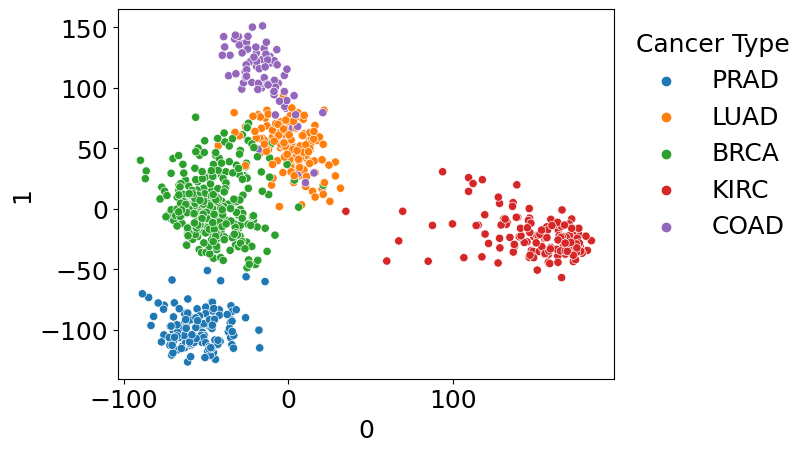

In [41]:
sns.scatterplot(x=0,y=1,hue = 'cancer_type', data=df_pca_8)
# Move the hue legend to the top right corner
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1), title="Cancer Type", frameon=False)
# Show the plot
plt.show()

### PCA implementation with statsmodels 

In [42]:
import numpy as np
from statsmodels.multivariate.pca import PCA

In [43]:
# Check for zero or near-zero variance features
variances = np.var(pca_data, axis=0)
near_zero_var_indices = np.where(variances < 1e-6)[0]
if near_zero_var_indices.size > 0:
    print("Features with near-zero variance found. Removing them...")
    data = np.delete(pca_data, near_zero_var_indices, axis=1)

Features with near-zero variance found. Removing them...


In [46]:
# Scale the data
scaled_data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

In [47]:
# check if standardization is correct (mean = 0, standarddeviation = 1)
print("mean: ", np.mean(scaled_data))
print("standarddeviation ", np.std(scaled_data))

mean:  1.5498765582443055e-18
standarddeviation  1.0000000000000002


In [48]:
# Perform PCA with two components
pca_stats = PCA(scaled_data, ncomp=2)
pca_stats

Principal Component Analysis(nobs: 801, nvar: 20264, transformation: Standardize (Correlation), normalization: True, number of components: 2, SVD, id: 0x2aeaeeb9490)

In [49]:
# Get the eigenvalues and eigenvectors
eigenvalues = pca_stats.eigenvals
eigenvectors = pca_stats.eigenvecs

In [50]:
# Display eigenvalues and eigenvectors
print("Eigenvalues:")
print(eigenvalues)

print("Eigenvectors:")
print(eigenvectors)

Eigenvalues:
[1710760.81560115 1420940.09173488]
Eigenvectors:
[[ 0.00097941  0.00230787]
 [-0.00235639 -0.00637287]
 [-0.00496579  0.00046648]
 ...
 [ 0.00233708 -0.01493974]
 [ 0.00195967 -0.00232062]
 [ 0.00104891  0.00100493]]


In [51]:
# Get the transformed data
transformed_data = pca_stats.factors
transformed_data

array([[-0.04392104,  0.08004063],
       [-0.01293573,  0.00061447],
       [-0.05378237, -0.01619363],
       ...,
       [-0.00315995,  0.01316241],
       [-0.02355939,  0.02812544],
       [-0.01708351,  0.00339954]])

In [52]:
transformed_data.shape

(801, 2)

plot the first two components

In [53]:
# Put the data back on the 2 columns defined 
transformed_df = pd.DataFrame(transformed_data)
# Add the convereted categorical data for 
transformed_df['cancer_type']=dataframe['Class']
transformed_df

,0,1,cancer_type
0,-0.043921,0.080041,PRAD
1,-0.012936,0.000614,LUAD
2,-0.053782,-0.016194,PRAD
3,-0.037586,-0.007741,PRAD
4,-0.013863,-0.043059,BRCA
...,...,...,...
796,-0.009494,-0.035504,BRCA
797,-0.022490,0.023931,LUAD
798,-0.003160,0.013162,COAD
799,-0.023559,0.028125,PRAD


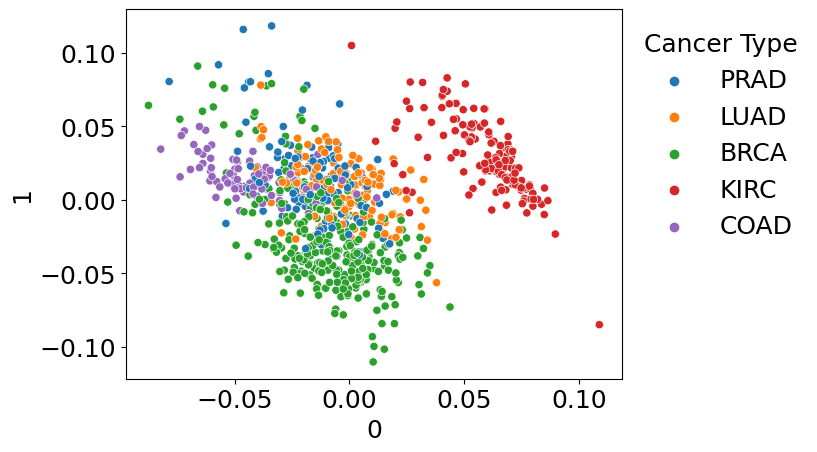

In [54]:
sns.scatterplot(x=0,y=1,hue = 'cancer_type', data=transformed_df)
# Move the hue legend to the top right corner
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1), title="Cancer Type", frameon=False)
# Show the plot
plt.show()

2 components but on centered, not scaled data

In [60]:
from data_cleaning import center_data
centered_data = center_data(data)
# Perform PCA with two components
pca_centered = PCA(centered_data, ncomp=2, standardize=False)
pca_centered

Principal Component Analysis(nobs: 801, nvar: 20264, transformation: Demean (Covariance), normalization: True, number of components: 2, SVD, id: 0x2aeaee1a890)

In [61]:
# Get the eigenvalues and eigenvectors
eigenvalues_c = pca_centered.eigenvals
eigenvectors_c = pca_centered.eigenvecs

# Display eigenvalues and eigenvectors
print("Eigenvalues:")
print(eigenvalues_c)

print("Eigenvectors:")
print(eigenvectors_c)

Eigenvalues:
[4589316.92233007 3043586.75088775]
Eigenvectors:
[[ 1.39681884e-04  6.97446652e-06]
 [-3.07812345e-03 -4.25819540e-04]
 [-3.77618658e-03  2.09158580e-03]
 ...
 [-1.23150936e-03  1.54605547e-03]
 [-3.50311464e-03  9.79326542e-03]
 [ 3.27959779e-04 -3.22110306e-04]]


In [62]:
# Get the transformed data
transformed_data_c = pca_centered.factors
transformed_data_c

array([[-0.0292939 ,  0.05392218],
       [-0.00113566, -0.05192392],
       [-0.03326699,  0.00462264],
       ...,
       [ 0.00489493, -0.01236429],
       [-0.0257034 ,  0.05296081],
       [-0.02292104,  0.02923191]])

plot

In [63]:
# Put the data back on the 2 columns defined 
transformed_df_c = pd.DataFrame(transformed_data_c)
# Add the convereted categorical data for 
transformed_df_c['cancer_type']=dataframe['Class']
transformed_df_c

,0,1,cancer_type
0,-0.029294,0.053922,PRAD
1,-0.001136,-0.051924,LUAD
2,-0.033267,0.004623,PRAD
3,-0.039571,0.041984,PRAD
4,-0.032470,0.005510,BRCA
...,...,...,...
796,-0.028410,0.012770,BRCA
797,-0.006752,-0.030604,LUAD
798,0.004895,-0.012364,COAD
799,-0.025703,0.052961,PRAD


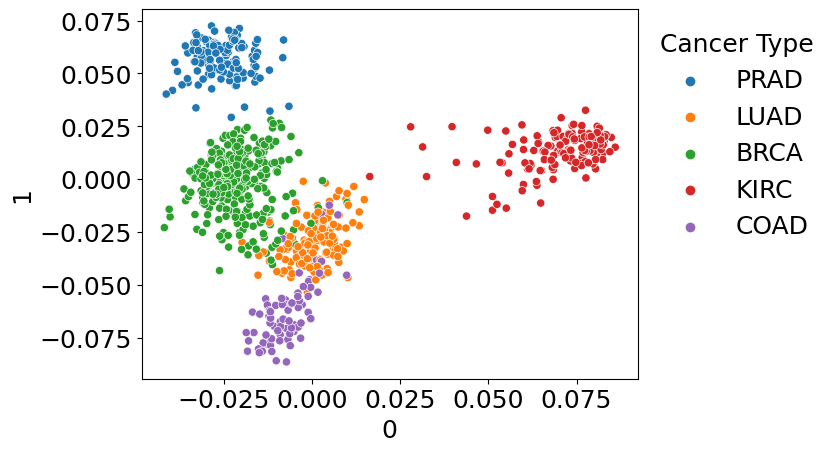

In [64]:
sns.scatterplot(x=0,y=1,hue = 'cancer_type', data=transformed_df_c)
# Move the hue legend to the top right corner
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1), title="Cancer Type", frameon=False)
# Show the plot
plt.show()

explained variance at 95% (takes around 6-7 minutes)

In [65]:
# Perform PCA
pca_stats_95 = PCA(scaled_data, standardize=False)

# Compute explained variance ratios
explained_variances = pca_stats_95.eigenvals / np.sum(pca_stats_95.eigenvals)

# Determine the number of components needed for 95% explained variance
cumulative_variance = np.cumsum(explained_variances)
num_components = np.argmax(cumulative_variance >= 0.95) + 1

# Print the number of components needed
print("Number of components for 95% explained variance:", num_components)

Number of components for 95% explained variance: 478


In [66]:
# Get the eigenvalues and eigenvectors
eigenvalues1 = pca_stats_95.eigenvals
eigenvectors1 = pca_stats_95.eigenvecs

In [67]:
# Display eigenvalues and eigenvectors
print("Eigenvalues:")
print(eigenvalues1)

print("Eigenvectors:")
print(eigenvectors1)

Eigenvalues:
[4.58931692e+06 3.04358675e+06 2.74463400e+06 1.88364759e+06
 1.04764741e+06 8.61348484e+05 7.69923280e+05 4.52810805e+05
 4.07708098e+05 3.55494037e+05 2.78197762e+05 2.57946478e+05
 2.19694695e+05 2.09499848e+05 1.92398686e+05 1.84781358e+05
 1.65011701e+05 1.49971135e+05 1.33902508e+05 1.29089745e+05
 1.28494757e+05 1.17766673e+05 1.14589806e+05 1.08135074e+05
 1.06791329e+05 1.03061181e+05 1.00976051e+05 9.17723357e+04
 8.99348579e+04 8.55464473e+04 8.38024051e+04 8.00578946e+04
 7.91343724e+04 7.59301321e+04 7.28461436e+04 7.27623304e+04
 6.97260552e+04 6.82894095e+04 6.72726757e+04 6.53231505e+04
 6.43301279e+04 6.30181574e+04 6.14688072e+04 6.09487756e+04
 6.04424156e+04 5.91942906e+04 5.69290518e+04 5.67135440e+04
 5.60441339e+04 5.48025924e+04 5.26695046e+04 5.17274963e+04
 5.09301228e+04 5.00405374e+04 4.93774824e+04 4.86668308e+04
 4.75929840e+04 4.71944897e+04 4.67258133e+04 4.57812342e+04
 4.55328112e+04 4.50524588e+04 4.46955605e+04 4.38315551e+04
 4.29707416

In [68]:
# Get the transformed data
transformed_data_95 = pca_stats_95.factors
transformed_data_95

array([[-0.0292939 ,  0.05392218,  0.05403523, ..., -0.0258521 ,
         0.01057207, -0.02998766],
       [-0.00113566, -0.05192392, -0.00064424, ...,  0.00362083,
         0.00214385,  0.03417711],
       [-0.03326699,  0.00462264,  0.03990626, ...,  0.00934993,
         0.00073425, -0.02866468],
       ...,
       [ 0.00489493, -0.01236429,  0.02495686, ..., -0.00539708,
        -0.00504012, -0.01874229],
       [-0.0257034 ,  0.05296081,  0.04831915, ...,  0.00465882,
         0.00612084,  0.03401174],
       [-0.02292104,  0.02923191,  0.02444855, ..., -0.05667834,
        -0.0019708 ,  0.01267861]])

In [69]:
# Put the data back on the 2 columns defined 
transformed_95_df = pd.DataFrame(transformed_data_95)
# Add the convereted categorical data for 
transformed_95_df['cancer_type']=dataframe['Class']
transformed_95_df

,0,1,2,3,4,5,6,7,8,9,...,792,793,794,795,796,797,798,799,800,cancer_type
0,-0.029294,0.053922,0.054035,-0.011616,0.079550,0.015083,-0.008794,0.034086,-0.051428,0.003694,...,-0.010998,0.011003,-0.023666,0.042590,-0.000698,0.031727,-0.025852,0.010572,-0.029988,PRAD
1,-0.001136,-0.051924,-0.000644,-0.038677,-0.015316,-0.065557,-0.011690,0.072555,0.022329,0.020486,...,0.009644,0.001320,0.007815,0.015800,0.004936,-0.004691,0.003621,0.002144,0.034177,LUAD
2,-0.033267,0.004623,0.039906,0.059296,-0.007353,-0.118334,-0.006290,0.019861,0.060164,0.008595,...,0.003288,-0.016170,0.001567,0.008897,-0.010748,0.003304,0.009350,0.000734,-0.028665,PRAD
3,-0.039571,0.041984,0.044777,0.019689,-0.017630,-0.054000,0.003983,0.016820,0.013030,0.005282,...,0.004836,0.015079,-0.028499,0.022723,-0.029278,-0.028154,0.020792,0.003319,-0.030401,PRAD
4,-0.032470,0.005510,-0.040742,0.025406,-0.001755,0.007194,0.003238,-0.024937,-0.077241,-0.017625,...,-0.037035,-0.012982,-0.031955,-0.007612,-0.010874,-0.003452,-0.023642,0.015350,0.093408,BRCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,-0.028410,0.012770,-0.048849,0.031090,0.007663,0.004897,0.031458,0.013138,-0.049383,-0.010701,...,-0.022714,-0.039405,0.003743,0.000785,-0.026431,0.003695,0.007289,-0.008312,-0.110745,BRCA
797,-0.006752,-0.030604,0.023030,-0.046061,0.022275,-0.042607,0.054589,-0.059332,-0.019441,-0.072731,...,0.018296,-0.005517,0.000690,-0.002143,0.000838,0.005564,0.002816,0.002422,-0.174855,LUAD
798,0.004895,-0.012364,0.024957,-0.043455,-0.002113,0.103927,-0.043736,-0.069842,0.094914,-0.100576,...,-0.001417,0.000802,-0.004879,-0.014245,-0.014287,-0.005683,-0.005397,-0.005040,-0.018742,COAD
799,-0.025703,0.052961,0.048319,-0.005670,0.014831,-0.002762,-0.009673,-0.015710,0.018340,-0.002187,...,-0.015172,0.015079,-0.004582,0.010839,-0.009338,0.003942,0.004659,0.006121,0.034012,PRAD


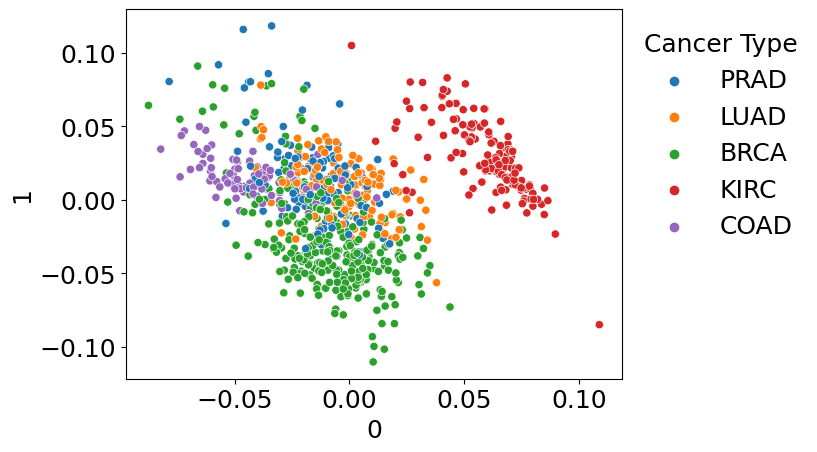

In [71]:
sns.scatterplot(x=0,y=1,hue = 'cancer_type', data=transformed_df)
# Move the hue legend to the top right corner
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1), title="Cancer Type", frameon=False)
# Show the plot
plt.show()

### Compare Own PCA and libaries

In [75]:
# own PCA for two components
from dataimport import random_sample
from our_pca import our_pca

centered_dataframe = pd.DataFrame(centered_data)

n_components = 2
data = random_sample(centered_dataframe, 801, 2000)
own_pca = our_pca(data, n_components)

In [76]:
own_eigenvalues, own_eigenvectors = own_pca

# Display eigenvalues and eigenvectors
print("Eigenvalues:")
print(own_eigenvalues)

print("Eigenvectors:")
print(own_eigenvectors)

Eigenvalues:
[590.44737284 343.91366256]
Eigenvectors:
[[-0.00026562 -0.00313541]
 [ 0.00985365  0.04324576]
 [ 0.01358225 -0.0019845 ]
 ...
 [ 0.00074957  0.00103775]
 [-0.00185485  0.01108174]
 [ 0.00487036  0.00756136]]


In [93]:
own_eig_df = pd.DataFrame(own_eigenvectors)
# Rename the columns
own_eig_df.columns = ["eigenvec_0", "eigenvec_1"]
own_eig_df

,eigenvec_0,eigenvec_1
0,-0.000266,-0.003135
1,0.009854,0.043246
2,0.013582,-0.001984
3,-0.000687,-0.003427
4,0.005555,0.001763
...,...,...
1995,-0.019830,-0.028988
1996,-0.001090,0.002444
1997,0.000750,0.001038
1998,-0.001855,0.011082


#### own PCA and statsmodels
comparison statsmodels on smaller dataset

In [78]:
from statsmodels.multivariate.pca import PCA

In [79]:
# Perform PCA with two components
pca_stats_sample = PCA(data, ncomp=2, standardize=False)
pca_stats_sample

Principal Component Analysis(nobs: 801, nvar: 2000, transformation: Demean (Covariance), normalization: True, number of components: 2, SVD, id: 0x2aeb476ed10)

In [80]:
# Get the eigenvalues and eigenvectors
eigenvalues_sample = pca_stats_sample.eigenvals
eigenvectors_sample = pca_stats_sample.eigenvecs

# Display eigenvalues and eigenvectors
print("Eigenvalues:")
print(eigenvalues_sample)

print("Eigenvectors:")
print(eigenvectors_sample)

Eigenvalues:
0    472357.898272
1    275130.930048
Name: eigenvals, dtype: float64
Eigenvectors:
      eigenvec_0  eigenvec_1
0      -0.000266   -0.003135
1       0.009854    0.043246
2       0.013582   -0.001984
3      -0.000687   -0.003427
4       0.005555    0.001763
...          ...         ...
1995   -0.019830   -0.028988
1996   -0.001090    0.002444
1997    0.000750    0.001038
1998   -0.001855    0.011082
1999    0.004870    0.007561

[2000 rows x 2 columns]


check if the outputs from our PCA and statsmodels are the same

In [94]:
# Check if the eigenvectors contain the same values
check_df = abs(eigenvectors_sample - own_eig_df)
check_df

,eigenvec_0,eigenvec_1
0,5.957691e-17,6.938894e-18
1,3.989864e-17,5.204170e-16
2,3.833739e-16,2.276825e-16
3,1.603535e-16,5.204170e-17
4,3.660267e-16,7.958044e-17
...,...,...
1995,2.775558e-17,5.204170e-17
1996,1.517883e-18,4.770490e-17
1997,2.710505e-18,2.168404e-19
1998,3.035766e-18,3.469447e-17


In [95]:
# Check if values in the DataFrame are nearly zero
is_close_to_zero = np.isclose(check_df, 0.0, atol=1e-10)
is_close_to_zero

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       ...,
       [ True,  True],
       [ True,  True],
       [ True,  True]])

In [96]:
# Check if all values in the array are True
np.all(is_close_to_zero)

True

#### own PCA and sklearn
comparison sklearn on smaller dataset

In [97]:
from sklearn.decomposition import PCA

In [98]:
# define number of components as 2 
pca_sk_sample=PCA(n_components=2)
pca_sk_sample.fit(data)

PCA(n_components=2)

In [99]:
eigenvectors_sk_sample = pca_sk_sample.components_
eigenvectors_sk_sample

array([[ 0.00026562, -0.00985365, -0.01358225, ..., -0.00074957,
         0.00185485, -0.00487036],
       [-0.00313541,  0.04324576, -0.0019845 , ...,  0.00103775,
         0.01108174,  0.00756136]])

In [101]:
#put own eigenvectors into a DataFrame while only using the real numbers from the given complex numbers
eigenvectors_sk_df = pd.DataFrame(eigenvectors_sk_sample.transpose())
# Rename columns
eigenvectors_sk_df.columns = ['eigenvec_0', 'eigenvec_1']
eigenvectors_sk_df


,eigenvec_0,eigenvec_1
0,0.000266,-0.003135
1,-0.009854,0.043246
2,-0.013582,-0.001984
3,0.000687,-0.003427
4,-0.005555,0.001763
...,...,...
1995,0.019830,-0.028988
1996,0.001090,0.002444
1997,-0.000750,0.001038
1998,0.001855,0.011082


check if the outputs from our PCA and sklearn are the same

In [102]:
# Check if the eigenvectors contain the same values
check_df2 = abs(eigenvectors_sk_df - own_eig_df)
check_df2

,eigenvec_0,eigenvec_1
0,0.000531,4.501056e-11
1,0.019707,1.067436e-10
2,0.027164,1.110956e-10
3,0.001375,1.728935e-10
4,0.011110,7.334658e-11
...,...,...
1995,0.039660,3.641551e-11
1996,0.002181,6.398930e-11
1997,0.001499,2.445137e-12
1998,0.003710,1.225743e-10


In [103]:
# Check if values in the DataFrame are nearly zero
is_close_to_zero2 = np.isclose(check_df2, 0.0, atol=1e-10)
is_close_to_zero2

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [False,  True]])

In [104]:
# Check if all values in the array are True
np.all(is_close_to_zero2)

False

## Classification using Decision Tree

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score
# from sklearn.datasets import load_iris

In [106]:
# load data
# rausnehmen: dc = pca_data_2comp_unscaled

# initiate pca and classifier
pca = PCA()
classifier1 = DecisionTreeClassifier()
classifier2 = DecisionTreeClassifier()
classifier3 = DecisionTreeClassifier()

Train decision tree with original data

In [107]:
# Split the transformed data set
y = dataframe['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
# Fit the data
classifier1.fit(X_train, y_train)

DecisionTreeClassifier()

In [109]:
# predict labels with trained classifier
pred_labels = classifier1.predict(X_test)
pred_labels

array(['LUAD', 'BRCA', 'PRAD', 'KIRC', 'BRCA', 'BRCA', 'BRCA', 'COAD',
       'PRAD', 'LUAD', 'COAD', 'BRCA', 'LUAD', 'PRAD', 'KIRC', 'LUAD',
       'LUAD', 'PRAD', 'BRCA', 'LUAD', 'LUAD', 'COAD', 'KIRC', 'BRCA',
       'BRCA', 'BRCA', 'COAD', 'BRCA', 'PRAD', 'PRAD', 'BRCA', 'PRAD',
       'PRAD', 'COAD', 'BRCA', 'BRCA', 'LUAD', 'BRCA', 'LUAD', 'BRCA',
       'COAD', 'BRCA', 'BRCA', 'BRCA', 'KIRC', 'PRAD', 'KIRC', 'COAD',
       'BRCA', 'BRCA', 'PRAD', 'LUAD', 'KIRC', 'BRCA', 'KIRC', 'BRCA',
       'KIRC', 'BRCA', 'LUAD', 'LUAD', 'LUAD', 'KIRC', 'PRAD', 'BRCA',
       'PRAD', 'BRCA', 'LUAD', 'PRAD', 'KIRC', 'BRCA', 'BRCA', 'LUAD',
       'BRCA', 'BRCA', 'BRCA', 'LUAD', 'PRAD', 'PRAD', 'KIRC', 'BRCA',
       'KIRC', 'BRCA', 'BRCA', 'KIRC', 'LUAD', 'BRCA', 'BRCA', 'PRAD',
       'COAD', 'COAD', 'COAD', 'KIRC', 'BRCA', 'BRCA', 'BRCA', 'PRAD',
       'LUAD', 'COAD', 'COAD', 'BRCA', 'BRCA', 'BRCA', 'BRCA', 'LUAD',
       'BRCA', 'KIRC', 'BRCA', 'KIRC', 'BRCA', 'BRCA', 'PRAD', 'KIRC',
      

In [110]:
# Evaluating the accuracy
accuracy = accuracy_score(y_test, pred_labels)
precision = precision_score(y_test, pred_labels, average='macro')
recall = recall_score(y_test, pred_labels, average='macro')
f1 = 2*precision*recall / (precision+recall)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

Accuracy: 0.9937888198757764
Precision: 0.9933333333333334
Recall: 0.993103448275862
F1: 0.9932183775026039


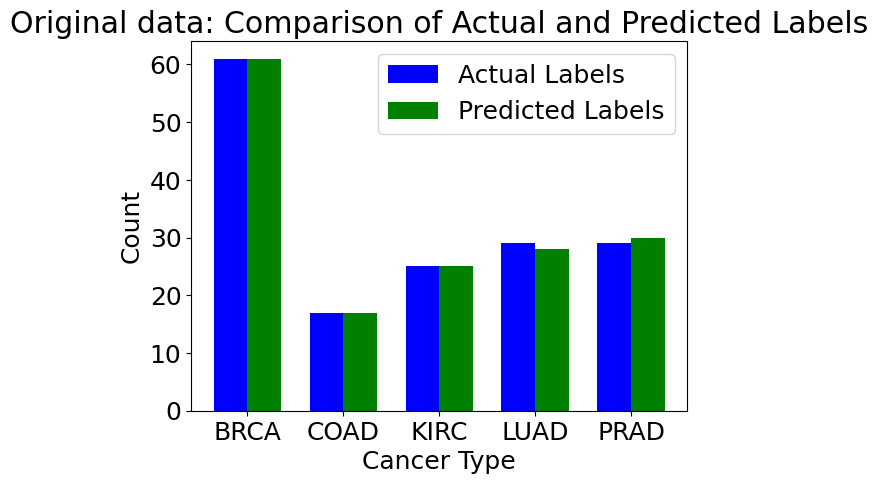

In [111]:
import matplotlib.pyplot as plt
import numpy as np

# Occurrences of each cancer type in the actual labels (y_test)
unique_labels_test, label_counts_test = np.unique(y_test, return_counts=True)

# Occurrences of each cancer type in the predicted labels (pred_labels)
unique_labels_pred, label_counts_pred = np.unique(pred_labels, return_counts=True)

# Unique cancer types
unique_labels = np.unique(np.concatenate((unique_labels_test, unique_labels_pred)))

bar_width = 0.35

# x-axis positions
index = np.arange(len(unique_labels))

# Plot the bars for actual labels (y_test)
plt.bar(index, label_counts_test, bar_width, label='Actual Labels', color='blue')

# Plot the bars for predicted labels (pred_labels)
plt.bar(index + bar_width, label_counts_pred, bar_width, label='Predicted Labels', color='green')

# Set x-axis labels and tick positions
plt.xlabel('Cancer Type')
plt.ylabel('Count')
plt.title('Original data: Comparison of Actual and Predicted Labels')
plt.xticks(index + bar_width / 2, unique_labels)

plt.legend()
plt.show()

Train decisiontree with data from LIBRARY PCA (sklearn)

In [112]:
# apply pca
transformed_data = pca.fit_transform(X_train)

In [113]:
# Fit the data
classifier2.fit(transformed_data, y_train)

DecisionTreeClassifier()

In [114]:
# predict new data
newdata = X_test
# transform newdata using fitted pca
newdata_transformed = pca.transform(newdata)
# predict labels with trained classifier
pred_labels = classifier2.predict(newdata_transformed)

pred_labels

array(['LUAD', 'BRCA', 'LUAD', 'KIRC', 'BRCA', 'BRCA', 'BRCA', 'COAD',
       'PRAD', 'LUAD', 'COAD', 'BRCA', 'LUAD', 'PRAD', 'KIRC', 'LUAD',
       'LUAD', 'PRAD', 'BRCA', 'LUAD', 'LUAD', 'COAD', 'KIRC', 'BRCA',
       'BRCA', 'BRCA', 'COAD', 'BRCA', 'PRAD', 'PRAD', 'BRCA', 'PRAD',
       'PRAD', 'COAD', 'BRCA', 'BRCA', 'LUAD', 'BRCA', 'LUAD', 'BRCA',
       'COAD', 'BRCA', 'BRCA', 'BRCA', 'KIRC', 'PRAD', 'KIRC', 'COAD',
       'BRCA', 'BRCA', 'PRAD', 'LUAD', 'KIRC', 'BRCA', 'KIRC', 'BRCA',
       'KIRC', 'BRCA', 'LUAD', 'LUAD', 'LUAD', 'KIRC', 'PRAD', 'BRCA',
       'PRAD', 'BRCA', 'LUAD', 'PRAD', 'KIRC', 'BRCA', 'BRCA', 'LUAD',
       'BRCA', 'BRCA', 'BRCA', 'LUAD', 'PRAD', 'PRAD', 'KIRC', 'BRCA',
       'KIRC', 'BRCA', 'BRCA', 'KIRC', 'LUAD', 'BRCA', 'BRCA', 'PRAD',
       'COAD', 'COAD', 'COAD', 'KIRC', 'BRCA', 'BRCA', 'BRCA', 'PRAD',
       'LUAD', 'COAD', 'COAD', 'BRCA', 'BRCA', 'BRCA', 'BRCA', 'LUAD',
       'BRCA', 'KIRC', 'BRCA', 'KIRC', 'BRCA', 'BRCA', 'PRAD', 'KIRC',
      

In [115]:
# Evaluating the accuracy
accuracy = accuracy_score(y_test, pred_labels)
precision = precision_score(y_test, pred_labels, average='macro')
recall = recall_score(y_test, pred_labels, average='macro')
f1 = 2*precision*recall / (precision+recall)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

Accuracy: 0.9937888198757764
Precision: 0.9888888888888889
Recall: 0.993103448275862
F1: 0.9909916876087377


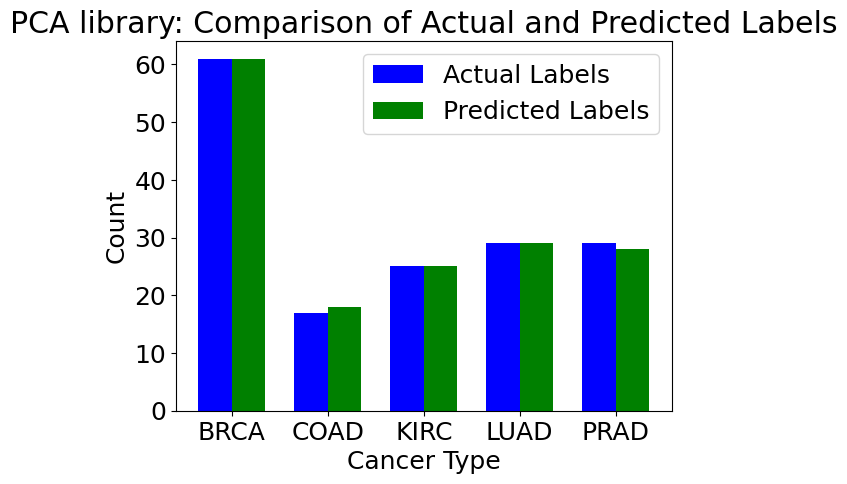

In [116]:
import matplotlib.pyplot as plt
import numpy as np

# Occurrences of each cancer type in the actual labels (y_test)
unique_labels_test, label_counts_test = np.unique(y_test, return_counts=True)

# Occurrences of each cancer type in the predicted labels (pred_labels)
unique_labels_pred, label_counts_pred = np.unique(pred_labels, return_counts=True)

# Unique cancer types
unique_labels = np.unique(np.concatenate((unique_labels_test, unique_labels_pred)))

bar_width = 0.35

# x-axis positions
index = np.arange(len(unique_labels))

# Plot the bars for actual labels (y_test)
plt.bar(index, label_counts_test, bar_width, label='Actual Labels', color='blue')

# Plot the bars for predicted labels (pred_labels)
plt.bar(index + bar_width, label_counts_pred, bar_width, label='Predicted Labels', color='green')

# Set x-axis labels and tick positions
plt.xlabel('Cancer Type')
plt.ylabel('Count')
plt.title('PCA library: Comparison of Actual and Predicted Labels')
plt.xticks(index + bar_width / 2, unique_labels)

plt.legend()
plt.show()

Train decisiontree with data from OWN PCA

In [117]:
from dataimport import random_sample
from our_pca import our_pca, apply_components
from data_cleaning import center_data

In [118]:
# Getting sample from data and defining X and y
data_sample = random_sample(dataframe, 801, 2000, labeled=True)

y = data_sample['Class']
X = center_data(data_sample.drop(['Class'], axis=1))

# Split the transformed data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[7733, 20473, 5679, 4848, 8669, 16694, 4113, 13511, 12740, 18748, 12022, 19320, 2122, 9712, 19023, 3863, 5779, 10426, 333, 198, 17547, 9933, 12971, 6001, 17124, 16900, 26, 12380, 17896, 16188, 11363, 16723, 4173, 8601, 10944, 20406, 10953, 19941, 19690, 16660, 2525, 20257, 15670, 11890, 4981, 19452, 13809, 12388, 9926, 5244, 15715, 19652, 4030, 18746, 15563, 3832, 17783, 14670, 18321, 15942, 12815, 4100, 15721, 9421, 2598, 14268, 2761, 15628, 3178, 14112, 390, 12499, 16685, 5201, 2555, 5913, 20184, 12021, 132, 5476, 13225, 9599, 3167, 14534, 11438, 18269, 8343, 10290, 10212, 11399, 10682, 5558, 2206, 14721, 8730, 16856, 4319, 6608, 786, 7234, 6542, 18610, 5216, 17059, 10565, 6431, 257, 17959, 11023, 18449, 19359, 8067, 17298, 8733, 5610, 1511, 10272, 8021, 11506, 4466, 13899, 12091, 2879, 4841, 517, 11951, 3735, 12509, 13329, 11229, 6157, 12797, 7282, 3469, 3847, 14633, 12292, 81, 16422, 17242, 19570, 17030, 17687, 20100, 18990, 14873, 7367, 8887, 3424, 19021, 4939, 938, 13253, 9113, 1

In [119]:
# Applying our own PCA
eigenvalues, eigenvectors = our_pca(X_train, 2)

#put own eigenvectors into a DataFrame while only using the real numbers from the given complex numbers
real_eigenvectors = pd.DataFrame(eigenvectors)
own_eig = pd.DataFrame()
own_eig['eigenvec_0'] = real_eigenvectors[0].to_numpy().real
own_eig['eigenvec_1'] = real_eigenvectors[1].to_numpy().real

transformed_data = apply_components(X_train, own_eig)

In [120]:
# Fit the data
classifier3.fit(transformed_data, y_train)

DecisionTreeClassifier()

In [121]:
# predict new data
newdata = X_test
# transform newdata using fitted pca
newdata_transformed = apply_components(newdata, own_eig)
# predict labels with trained classifier
pred_labels = classifier3.predict(newdata_transformed)

pred_labels

array(['COAD', 'LUAD', 'BRCA', 'BRCA', 'PRAD', 'BRCA', 'COAD', 'BRCA',
       'LUAD', 'BRCA', 'BRCA', 'PRAD', 'BRCA', 'LUAD', 'PRAD', 'PRAD',
       'KIRC', 'LUAD', 'PRAD', 'BRCA', 'BRCA', 'COAD', 'PRAD', 'PRAD',
       'BRCA', 'BRCA', 'KIRC', 'PRAD', 'BRCA', 'BRCA', 'KIRC', 'KIRC',
       'BRCA', 'PRAD', 'BRCA', 'PRAD', 'LUAD', 'PRAD', 'BRCA', 'KIRC',
       'BRCA', 'COAD', 'PRAD', 'BRCA', 'BRCA', 'KIRC', 'COAD', 'BRCA',
       'BRCA', 'PRAD', 'KIRC', 'BRCA', 'KIRC', 'BRCA', 'PRAD', 'PRAD',
       'PRAD', 'BRCA', 'LUAD', 'BRCA', 'LUAD', 'KIRC', 'BRCA', 'LUAD',
       'COAD', 'BRCA', 'KIRC', 'KIRC', 'LUAD', 'BRCA', 'LUAD', 'LUAD',
       'KIRC', 'COAD', 'PRAD', 'BRCA', 'BRCA', 'PRAD', 'BRCA', 'KIRC',
       'PRAD', 'PRAD', 'COAD', 'KIRC', 'LUAD', 'BRCA', 'COAD', 'BRCA',
       'BRCA', 'KIRC', 'LUAD', 'PRAD', 'KIRC', 'KIRC', 'LUAD', 'BRCA',
       'BRCA', 'BRCA', 'COAD', 'BRCA', 'KIRC', 'KIRC', 'KIRC', 'COAD',
       'COAD', 'COAD', 'BRCA', 'KIRC', 'LUAD', 'BRCA', 'LUAD', 'BRCA',
      

In [122]:
# Evaluating the accuracy
accuracy = accuracy_score(y_test, pred_labels)
precision = precision_score(y_test, pred_labels, average='macro')
recall = recall_score(y_test, pred_labels, average='macro')
f1 = 2*precision*recall / (precision+recall)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

Accuracy: 0.782608695652174
Precision: 0.7288280116110304
Recall: 0.7321212121212122
F1: 0.7304709001801077


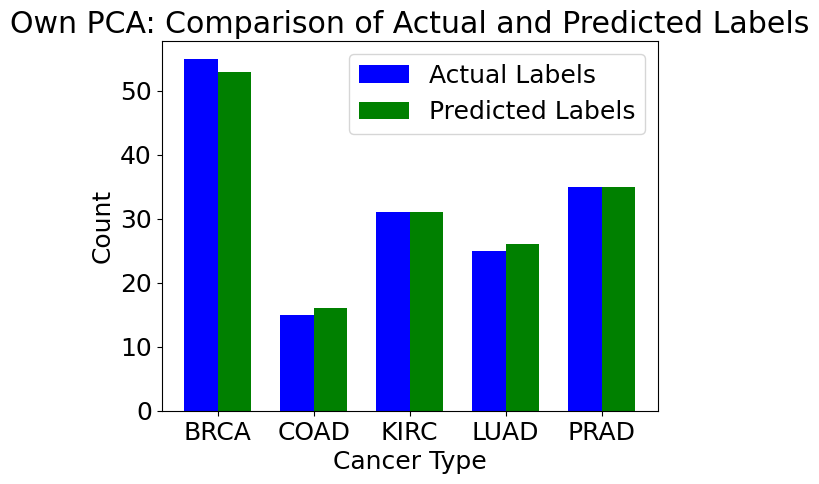

In [123]:
import matplotlib.pyplot as plt
import numpy as np

# Occurrences of each cancer type in the actual labels (y_test)
unique_labels_test, label_counts_test = np.unique(y_test, return_counts=True)

# Occurrences of each cancer type in the predicted labels (pred_labels)
unique_labels_pred, label_counts_pred = np.unique(pred_labels, return_counts=True)

# Unique cancer types
unique_labels = np.unique(np.concatenate((unique_labels_test, unique_labels_pred)))

bar_width = 0.35

# x-axis positions
index = np.arange(len(unique_labels))

# Plot the bars for actual labels (y_test)
plt.bar(index, label_counts_test, bar_width, label='Actual Labels', color='blue')

# Plot the bars for predicted labels (pred_labels)
plt.bar(index + bar_width, label_counts_pred, bar_width, label='Predicted Labels', color='green')

# Set x-axis labels and tick positions
plt.xlabel('Cancer Type')
plt.ylabel('Count')
plt.title('Own PCA: Comparison of Actual and Predicted Labels')
plt.xticks(index + bar_width / 2, unique_labels)

plt.legend()
plt.show()

Train decisiontree with data from LIBRARY T-SNE

In [127]:
from sklearn.manifold import TSNE

In [128]:
# Initiate classifier
classifier4 = DecisionTreeClassifier()

X = df1
y = dataframe['Class']

# Reduce data dimensionality using t-SNE
tsne = TSNE(learning_rate=200, perplexity=100)
X_tsne = tsne.fit_transform(X)

# Split the transformed data set
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.2, random_state=42)

# Train the classifier
classifier4.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier4.predict(X_test)

# Evaluating the accuracy, precision, recall, f1
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = 2*precision*recall / (precision+recall)
print("Prediction success for only 2000 features, transformed with own components:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

Prediction success for only 2000 features, transformed with own components:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


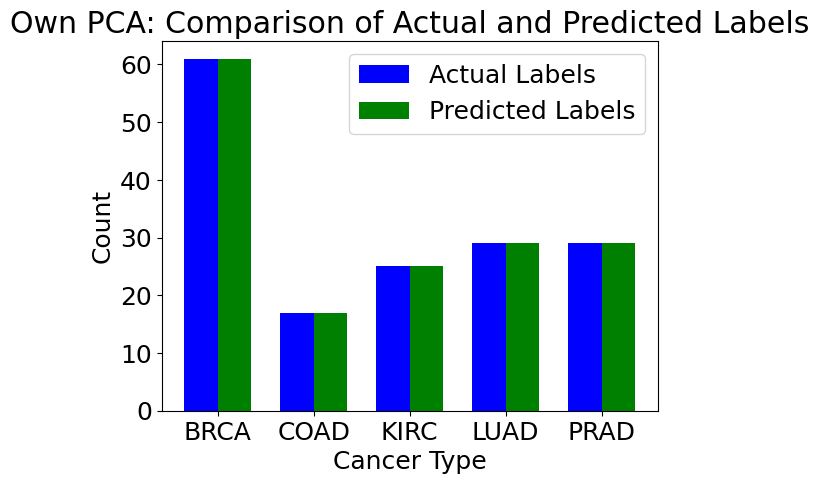

In [129]:
# Occurrences of each cancer type in the actual labels (y_test)
unique_labels_test, label_counts_test = np.unique(y_test, return_counts=True)

# Occurrences of each cancer type in the predicted labels (pred_labels)
unique_labels_pred, label_counts_pred = np.unique(y_pred, return_counts=True)

# Unique cancer types
unique_labels = np.unique(np.concatenate((unique_labels_test, unique_labels_pred)))

bar_width = 0.35

# x-axis positions
index = np.arange(len(unique_labels))

# Plot the bars for actual labels (y_test)
plt.bar(index, label_counts_test, bar_width, label='Actual Labels', color='blue')

# Plot the bars for predicted labels (pred_labels)
plt.bar(index + bar_width, label_counts_pred, bar_width, label='Predicted Labels', color='green')

# Set x-axis labels and tick positions
plt.xlabel('Cancer Type')
plt.ylabel('Count')
plt.title('Own PCA: Comparison of Actual and Predicted Labels')
plt.xticks(index + bar_width / 2, unique_labels)

plt.legend()
plt.show()